In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

from sklearn.metrics import r2_score,mean_squared_error



In [ ]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/200.3 MB 67.5 kB/s eta 0:47:53

In [3]:
df = pd.read_pickle('pickled_parquet_1.pkl')

In [4]:
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'total_sec', 'duration', 'PUmonth', 'DOmonth', 'PUday',
       'DOday', 'PUhour', 'DOhour', 'PUtime', 'DOtime', 'PUZone', 'DOZone'],
      dtype='object')

In [4]:
le=LabelEncoder()
df['PUday'] = le.fit_transform(df['PUday'])

In [6]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'total_sec', 'duration', 'PUmonth', 'DOmonth', 'PUday',
       'DOday', 'PUhour', 'DOhour', 'PUtime', 'DOtime', 'PUZone', 'DOZone'],
      dtype='object')

In [5]:
dftrain = df[['passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','total_sec','PUhour','PUday']]

In [6]:
dftest = df['total_amount']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(dftrain,dftest,test_size=0.3)

RMSE: 4.417673
Mean squared error: 19.52
Variance score: 0.89


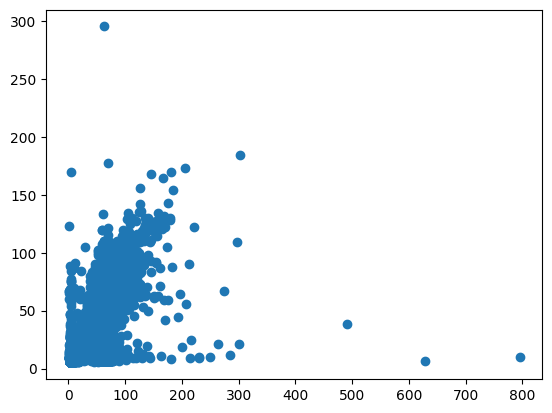

In [9]:
#LINEAR REGRESSION

lregr = LinearRegression()
lregr.fit(x_train,y_train)
LR_y_test_pred = lregr.predict(x_test)


# ERROR METRICS

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,LR_y_test_pred))
print("RMSE: %f" % (rmse))

# The Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,LR_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,LR_y_test_pred))

plt.scatter(y_test,LR_y_test_pred)

Cross val score :  [0.90048818 0.89796103 0.89801647 0.8803965  0.88288822 0.89803196]
Cross-Predicted Accuracy: 0.8932144973506406


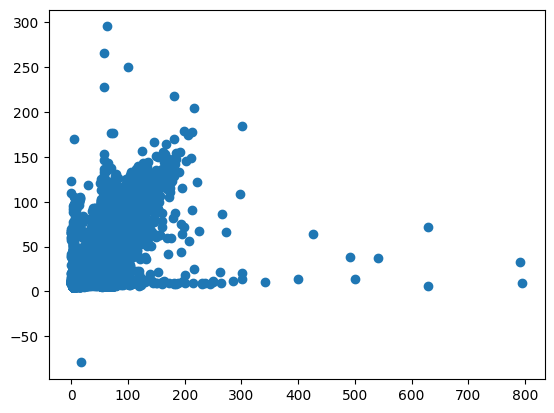

In [10]:
score = cross_val_score(lregr, dftrain, dftest,cv=6)
print('Cross val score : ',score)

    
predictions = cross_val_predict(lregr, dftrain, dftest, cv=6)
plt.scatter(dftest, predictions)

accuracy = r2_score(dftest,predictions)
print ("Cross-Predicted Accuracy:", accuracy)

## Decision Tree Regression


RMSE: 3.753000
Mean squared error: 14.09
Variance score: 0.92


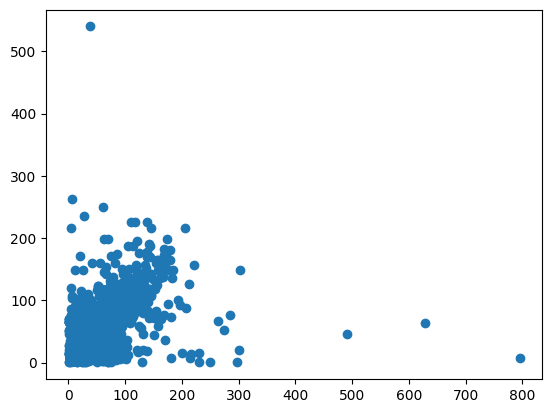

In [11]:
# TRAINING USING DECISION TREE REGRESSOR MODEL

dtr = DecisionTreeRegressor().fit(x_train,y_train)
DTR_y_test_pred = dtr.predict(x_test)

# Error Metrics

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,DTR_y_test_pred))
print("RMSE: %f" % (rmse))

# Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,DTR_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,DTR_y_test_pred))
plt.scatter(y_test,DTR_y_test_pred)

## Random Forest Regression

In [ ]:
# TRAINING USING DECISION TREE REGRESSOR MODEL

RF = RandomForestRegressor()
RF.fit(x_train,y_train)

In [ ]:
RF_y_test_pred = RF.predict(x_test)

In [11]:
# Error Metrics

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,RF_y_test_pred))
print("RMSE: %f" % (rmse))

# Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,RF_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,RF_y_test_pred))
plt.scatter(y_test,RF_y_test_pred)


KeyboardInterrupt

